## Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os, sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [5]:
attacks = ['ifgsm', 'pgd-ifgsm', 'korhonen-et-al', 'madc','ssah', 'cadv', 'random-noise', 'ftda', 'ftda-randn-init', 'madc-randn-init', 'ssah-randn-init', 'madc-linf', 'madc-norm','ftda-linf','mad-mix']
jpegai_codecs = ['jpegai-v61-hop', 'jpegai-v61-bop', 'jpegai-v51-hop', 'jpegai-v51-bop', 'jpegai-v41-hop', 'jpegai-v41-bop', 'jpegai-v71-hop', 'jpegai-v71-bop']
base_codecs = ['bmshj2018-hyperprior-vbr',
 'jpegai-v51-bop',
 'jpegai-v71-hop',
 'jpegai-v51-hop',
 'jpegai-v41-bop',
 'jpegai-v71-bop',
 'jpegai-v41-hop',
 'mbt2018',
 'jpegai-v61-hop',
 'bmshj2018-hyperprior',
 'cheng2020-attn',
 'jpegai-v61-bop',
 'evc',
 'cheng2020-anchor',
 'bmshj2018-factorized',
 'mbt2018-mean',
 'qres-vae',
 'cdc-xparam',
 'elic',
 'lic-tcm',
 'hific']

codec_variants = {'bmshj2018-hyperprior-vbr': ['1', '2', '4', '6'],
 'jpegai-v51-bop': ['b0002', 'b0012', 'b0075', 'b05'],
 'jpegai-v71-hop': ['b0002', 'b0012', 'b0075', 'b05'],
 'jpegai-v51-hop': ['b0002', 'b0012', 'b0075', 'b05'],
 'jpegai-v41-bop': ['b0002', 'b0007', 'b0015', 'b005'],
 'jpegai-v71-bop': ['b0002', 'b0012', 'b0075', 'b05'],
 'jpegai-v41-hop': ['b0002', 'b0007', 'b0015', 'b005'],
 'mbt2018': ['1', '2', '4', '6'],
 'jpegai-v61-hop': ['b0002', 'b0012', 'b0075', 'b05'],
 'bmshj2018-hyperprior': ['1', '2', '4', '6'],
 'cheng2020-attn': ['1', '2', '4', '6'],
 'jpegai-v61-bop': ['b0002', 'b0012', 'b0075', 'b05'],
 'evc': ['1', '2', '4', '6'],
 'cheng2020-anchor': ['1', '2', '4', '6'],
 'bmshj2018-factorized': ['1', '2', '4', '6'],
 'mbt2018-mean': ['1', '2', '4', '6'],
 'qres-vae': ['16', '256', '2048'],
 'cdc-xparam': ['b00032', 'b01024', 'b02048'],
 'elic': ['0004', '0016', '0450'],
 'lic-tcm': ['005', '0013', '00025'],
 'hific': ['014', '030', '045']}

better_loss_names = {
    'added_noises_loss':'Added Noises (YCbCr)',
    'added_noises_loss_Y':'Added Noises (Y)',
    'ftda_default_loss':'FTDA Loss (YCbCr)',
    'ftda_default_loss_Y':'FTDA Loss (Y)',
    'bpp_increase_loss':'Increase BPP (YCbCr)',
    'reconstr_loss':'Reconstruction Loss (YCbCr, $L_2$)',
    'reconstr_loss_Y':'Reconstruction Loss (Y, $L_2$)',
    'reconstruction_msssim_loss':'Reconstruction Loss (YCbCr, MS-SSIM)',
    'ftda_msssim_loss':'FTDA Loss (YCbCr, MS-SSIM)',
    'src_reconstr_loss_Y':'Source Reconstruction (Y, $L_2$)'
}
defense_2_name = {
    'diffpure':'DiffPure',
    'no_defence':'W/o defense',
    'reversible_ensemble':'Rand. Ensemble',
    'reversible_flip':'Flip',
    'reversible_random_color_order':'Color Reorder',
    'reversible_random_rotate':'Rotate',
    'reversible_random_roll':'Roll',
    'self_ensemble':'Self-Ensemble'
}

codec_2_name = {
    'mbt2018':'MBT-2018',
    'bmshj2018-factorized':'Balle et al.\n(factorized)',
    'bmshj2018-hyperprior':'Balle et al.\n(hyperprior)',
    'cheng2020-attn':'Cheng et al.\n(attn)',
    'cheng2020-anchor':'Cheng et al.\n(anchor)',
    'hific':'HiFiC',
    'lic-tcm':'LIC-TCM',
    'qres-vae':'QRes-VAE',
    'elic':'ELIC',
    'evc':'EVC',
    'cdc-xparam':'CDC',
    'mbt2018-mean':'MBT-2018\n(mean)',
    'jpegai-v71-hop':'JPEG-AI v7.1, HOP',
    'jpegai-v71-bop':'JPEG-AI v7.1, BOP',
    'jpegai-v61-hop':'JPEG-AI v6.1, HOP',
    'jpegai-v61-bop':'JPEG-AI v6.1, BOP',
    'jpegai-v51-hop':'JPEG-AI v5.1, HOP',
    'jpegai-v51-bop':'JPEG-AI v5.1, BOP',
    'jpegai-v41-hop':'JPEG-AI v4.1, HOP',
    'jpegai-v41-bop':'JPEG-AI v4.1, BOP',

    'jpegai-v71-hop-tools-on':'JPEG-AI v7.1, HOP',
    'jpegai-v71-bop-tools-on':'JPEG-AI v7.1, BOP',
    'jpegai-v61-hop-tools-on':'JPEG-AI v6.1, HOP',
    'jpegai-v61-bop-tools-on':'JPEG-AI v6.1, BOP',
    'jpegai-v51-hop-tools-on':'JPEG-AI v5.1, HOP',
    'jpegai-v51-bop-tools-on':'JPEG-AI v5.1, BOP',
    'jpegai-v41-hop-tools-on':'JPEG-AI v4.1, HOP',
    'jpegai-v41-bop-tools-on':'JPEG-AI v4.1, BOP',
}

codec_order = ['mbt2018', 'mbt2018-mean', 'bmshj2018-factorized', 'bmshj2018-hyperprior', 'cheng2020-attn', 'cheng2020-anchor', 'hific',  'qres-vae', 'lic-tcm', 'elic', 'cdc-xparam'] + \
    ['jpegai-v71-bop', 'jpegai-v71-hop', 'jpegai-v61-bop','jpegai-v61-hop','jpegai-v51-bop','jpegai-v51-hop','jpegai-v41-bop', 'jpegai-v41-hop']
defense_order = ['diffpure', 'no_defence', 'reversible_ensemble', 'reversible_flip',
       'reversible_random_color_order', 'reversible_random_roll',
       'reversible_random_rotate', 'self_ensemble']

atk_2_name = {
    'ifgsm':'I-FGSM',
    'ftda':'FTDA',
    'ftda-linf':'FTDA-$L_{{\\infty}}$',
    'madc':'MADC',
    'madc-norm':'MADC-norm',
    'madc-linf':'MADC-$L_{{\\infty}}$',
    'pgd-ifgsm':'PGD',
    'ssah':'SSAH',
    'ssah-randn-init':'SSAH (Rand. init)',
    'mad-mix':'MAD-MIX'
}

## Load results

In [3]:
# merge all *_test.csv files
def merge_full_files(root_path, main_for_jpeg_ai = True):
    res_df = pd.DataFrame()
    for atk in Path(root_path).iterdir():
        if '.DS_Store' in str(atk):
            continue
        cur_atk_path = Path(root_path) / atk.stem

        for codec in Path(cur_atk_path).iterdir():
            if '.DS_Store' in str(codec):
                continue
            c = codec.stem
            cur_path = Path(f'{str(root_path)}/{atk.stem}/{c}')
            if ('jpeg' in c) and main_for_jpeg_ai:
                cv = 'mainc_test.csv'
            else:    
                cv = c + '_test.csv'
            
            log_path = cur_path / cv
            if log_path.exists():
                cur_df = pd.read_csv(log_path, index_col=0)
                c_name = '-'.join(c.split('-')[:-1])
                cur_df['codec_name'] = c_name
                cur_df['codec_variant'] = c.split('-')[-1]
                cur_df['codec_variant_num'] = codec_variants[c_name].index(c.split('-')[-1])
                res_df = pd.concat([res_df, cur_df], ignore_index=True)
    return res_df


In [6]:
merged_res = merge_full_files('./csvs') # path to csvs
# calculate deltas
merged_res['delta_psnr_new'] =  merged_res['psnr_clear_attacked'] - merged_res['psnr_defended-rec-clear_defended-rec-attacked']
merged_res['delta_vmaf_new'] =  merged_res['vmaf_clear_attacked'] - merged_res['vmaf_defended-rec-clear_defended-rec-attacked']

for fr in ['msssim', 'ssim', 'mse', 'psnr', 'l_inf', 'mae', 'vmaf']:
    merged_res[f'delta_{fr}_new'] =  merged_res[f'{fr}_clear_attacked'] - merged_res[f'{fr}_defended-rec-clear_defended-rec-attacked']
    merged_res[f'delta_{fr}_old'] =  merged_res[f'{fr}_clear_defended-rec-clear'] - merged_res[f'{fr}_attacked_defended-rec-attacked']
    merged_res[f'change_{fr}'] =  (merged_res[f'{fr}_clear_defended-rec-clear'] - merged_res[f'{fr}_attacked_defended-rec-attacked']) / merged_res[f'{fr}_clear_defended-rec-clear'] 
is_randn_map = {}
attack_base_name = {x:x for x in merged_res.attack.unique()}
for at in attacks:
    if at == 'pgd-ifgsm' or 'randn' in at:
        is_randn_map[at] = True
    else:
        is_randn_map[at] = False

merged_res['is_randn'] = merged_res['attack'].map(is_randn_map)
merged_res['attack_base_name'] = merged_res['attack'].map(attack_base_name)

In [7]:
merged_res.codec_name.unique()

array(['cheng2020-attn', 'jpegai-v71-bop'], dtype=object)

## Plots

Text(0.5, 0, 'NIC Model')

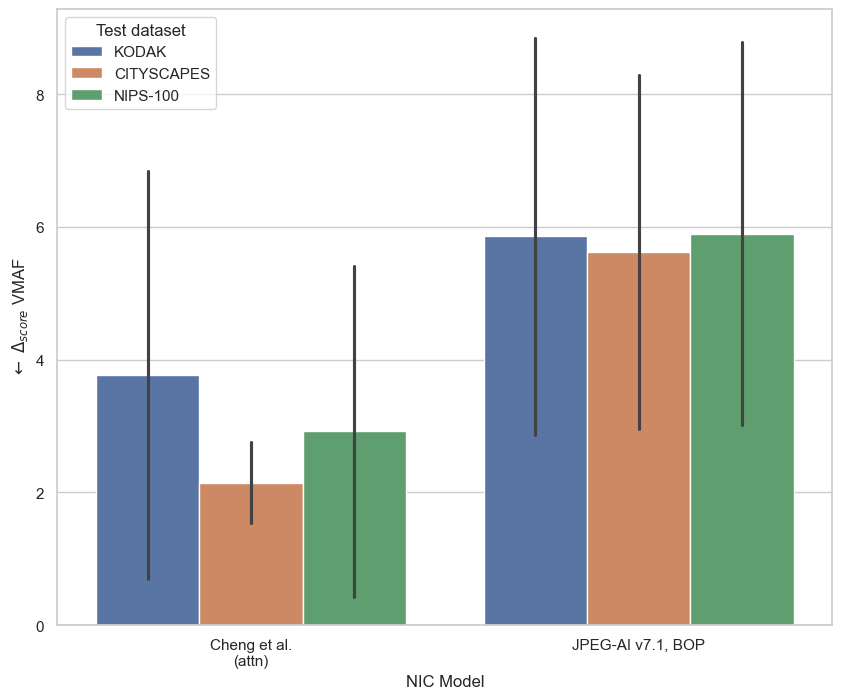

In [13]:
measure = 'delta_vmaf_new'
plot_data = merged_res.copy()
plot_data['codec_name'] = plot_data['codec_name'].apply(lambda x: codec_2_name[x])
sns.set(style='whitegrid')
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.barplot(data=plot_data, x='codec_name', hue='test_dataset', y=measure)

ax.legend(title='Test dataset')
ax.set_ylabel('$\\leftarrow$ $\Delta_{{score}}$ VMAF')
ax.set_xlabel('NIC Model')